In [175]:
import pandas as pd
from pandas import DataFrame,Series
import numpy as np

In [177]:
import os 
import warnings
warnings.filterwarnings("ignore")

In [179]:
import seaborn as sns
import matplotlib.pyplot as plt

# Importing Database

In [5]:
os.chdir("C://Users//Administrator//OneDrive//Desktop//Crop Production Predictive")

In [6]:
crop_data = pd.read_csv("Crop Production data.csv")

In [7]:
crop_data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [8]:
crop_data.tail()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0
246090,West Bengal,PURULIA,2014,Winter,Sesamum,175.0,88.0


# Data Profile

In [10]:
crop_data.shape

(246091, 7)

In [11]:
crop_data.describe(include="all")

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
count,246091,246091,246091.000000,246091,246091,2.460910e+05,2.423610e+05
unique,33,646,NaN,6,124,NaN,NaN
top,Uttar Pradesh,BIJAPUR,NaN,Kharif,Rice,NaN,NaN
freq,33306,945,NaN,95951,15104,NaN,NaN
mean,NaN,NaN,2005.643018,NaN,NaN,1.200282e+04,5.825034e+05
std,NaN,NaN,4.952164,NaN,NaN,5.052340e+04,1.706581e+07
min,NaN,NaN,1997.000000,NaN,NaN,4.000000e-02,0.000000e+00
25%,NaN,NaN,2002.000000,NaN,NaN,8.000000e+01,8.800000e+01
50%,NaN,NaN,2006.000000,NaN,NaN,5.820000e+02,7.290000e+02
75%,NaN,NaN,2010.000000,NaN,NaN,4.392000e+03,7.023000e+03


# Data Transformation

In [13]:
crop_data.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [14]:
#Production column having 3700 rows null values so we have to take this column we are going to replace it with the mean of production

In [15]:
grouped_data = crop_data["Production"]
mean_value = grouped_data.mean()

In [16]:
crop_data["Production"].fillna(value= mean_value,inplace=True)

In [17]:
crop_data.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [18]:
result = crop_data.dtypes
print("Output")
print(result)

Output
State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production       float64
dtype: object


In [19]:
crop_data["Area"]= crop_data["Area"].apply(lambda x: '%.0f' % x)

In [20]:
crop_data["Area"].unique()

array(['1254', '2', '102', ..., '302274', '11493', '279151'], dtype=object)

In [21]:
#converting the data type 

In [22]:
crop_data["Production"] =  crop_data["Production"].apply(lambda x: '%.0f' % x)

In [23]:
crop_data = crop_data.astype({"Area":int,"Production":int})

In [24]:
result = crop_data.dtypes
print("Output")
print(result)

Output
State_Name       object
District_Name    object
Crop_Year         int64
Season           object
Crop             object
Area              int32
Production        int32
dtype: object


In [25]:
crop_data["Crop"].unique()

array(['Arecanut', 'Other Kharif pulses', 'Rice', 'Banana', 'Cashewnut',
       'Coconut ', 'Dry ginger', 'Sugarcane', 'Sweet potato', 'Tapioca',
       'Black pepper', 'Dry chillies', 'other oilseeds', 'Turmeric',
       'Maize', 'Moong(Green Gram)', 'Urad', 'Arhar/Tur', 'Groundnut',
       'Sunflower', 'Bajra', 'Castor seed', 'Cotton(lint)', 'Horse-gram',
       'Jowar', 'Korra', 'Ragi', 'Tobacco', 'Gram', 'Wheat', 'Masoor',
       'Sesamum', 'Linseed', 'Safflower', 'Onion', 'other misc. pulses',
       'Samai', 'Small millets', 'Coriander', 'Potato',
       'Other  Rabi pulses', 'Soyabean', 'Beans & Mutter(Vegetable)',
       'Bhindi', 'Brinjal', 'Citrus Fruit', 'Cucumber', 'Grapes', 'Mango',
       'Orange', 'other fibres', 'Other Fresh Fruits', 'Other Vegetables',
       'Papaya', 'Pome Fruit', 'Tomato', 'Rapeseed &Mustard', 'Mesta',
       'Cowpea(Lobia)', 'Lemon', 'Pome Granet', 'Sapota', 'Cabbage',
       'Peas  (vegetable)', 'Niger seed', 'Bottle Gourd', 'Sannhamp',
       'Va

# Outliers detection 

In [27]:
crop_data.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

<Axes: ylabel='Area'>

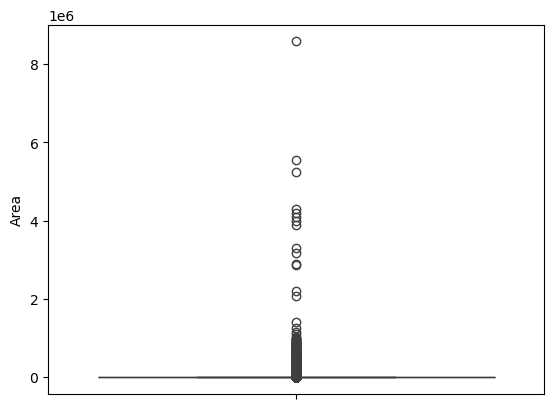

In [28]:
sns.boxplot(data = crop_data, y= "Area")

In [29]:
#There are some values present in our data set considered as outlier and we have to replace it with quantile method because taking it might cause
#the predictive analysis values

<Axes: xlabel='Production', ylabel='Area'>

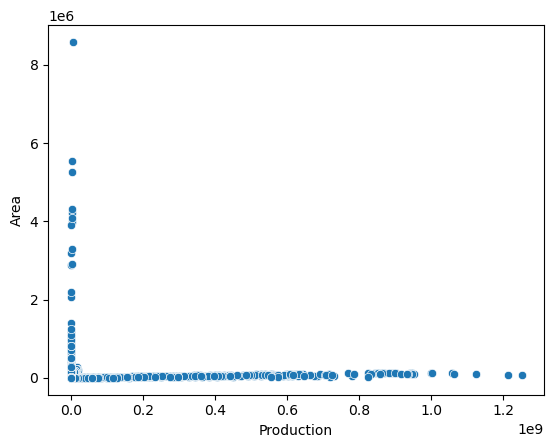

In [30]:
sns.scatterplot(data = crop_data, x= "Production",y="Area")

# Inter Qunatile Range method

In [32]:
q1 = crop_data["Area"].quantile(0.25)
q3 = crop_data["Production"].quantile(0.75)

In [33]:
iqr = q3 - q1

In [34]:
upper_limit = q3 + (1.5*iqr)
lower_limit = q1- (1.5*iqr)

In [35]:
#finding the outliers value for the variable area

In [36]:
crop_data[(crop_data["Area"] > upper_limit )]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
203,Andhra Pradesh,ANANTAPUR,1997,Kharif,Arhar/Tur,21400,2600
208,Andhra Pradesh,ANANTAPUR,1997,Kharif,Groundnut,650800,228400
216,Andhra Pradesh,ANANTAPUR,1997,Kharif,Rice,35600,75400
218,Andhra Pradesh,ANANTAPUR,1997,Kharif,Sunflower,35900,11100
221,Andhra Pradesh,ANANTAPUR,1997,Rabi,Gram,28000,14800
...,...,...,...,...,...,...,...
245954,West Bengal,PURULIA,2010,Winter,Rice,152676,261435
245985,West Bengal,PURULIA,2011,Winter,Rice,270270,731799
246017,West Bengal,PURULIA,2012,Winter,Rice,288735,729553
246052,West Bengal,PURULIA,2013,Winter,Rice,302274,730136


In [37]:
print("Lower limit : {}".format(lower_limit))
print("Upper limit : {}".format(upper_limit))

Lower limit : -11800.0
Upper limit : 19880.0


So we cannot replace the outliers because around 29000 number of rows are in it and our upper and lower limits are also not that effecient as well as the area should cannot be replace because it is sepcific for the particular location ... we can 
go as with this data

<Axes: xlabel='Area', ylabel='Production'>

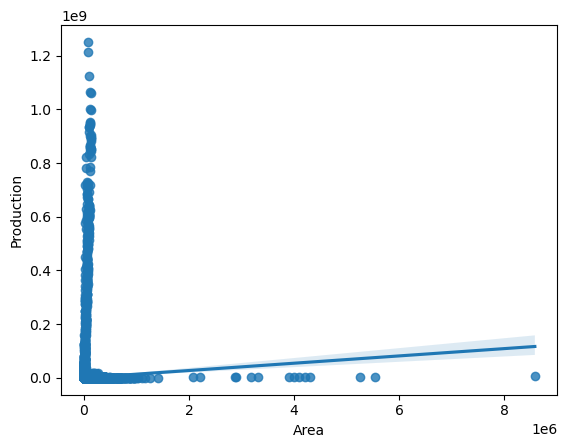

In [39]:
sns.regplot(data = crop_data,x = "Area",y="Production")

As we can see area is not the variable affecting the the crop production .. Yes increasing area can increase the production but as per the above plot
there are high production as well when the area is not too high

# Exploratory Data Analysis

Generating of new column Production Per Area that will gives us the clear picture that as per the area production is high or low

In [43]:
crop_data["Production/Area"] = crop_data["Production"]/crop_data["Area"]

In [44]:
crop_data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Production/Area
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254,2000,1.594896
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2,1,0.500000
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102,321,3.147059
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176,641,3.642045
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720,165,0.229167


In [45]:
crop_data["Production/Area"]= crop_data["Production/Area"].apply(lambda x: '%.3f' % x)

In [46]:
crop_data["Production/Area"] = crop_data["Production/Area"].astype(float)

In [47]:
group_2 = crop_data.groupby(["Crop_Year"],as_index=False).agg({"Area":"sum","Production":"sum","Production/Area":"sum"}).sort_values(by="Crop_Year")

In [48]:
result = crop_data.dtypes
print("Output")
print(result)

Output
State_Name          object
District_Name       object
Crop_Year            int64
Season              object
Crop                object
Area                 int32
Production           int32
Production/Area    float64
dtype: object


In [49]:
group_2["Production/Area"]= group_2["Production/Area"].apply(lambda x: '%.3f' % x)

In [50]:
group_2

,Crop_Year,Area,Production,Production/Area
0,1997,231715046,851232906,77002.432
1,1998,166988082,5983178954,47045395.085
2,1999,158666106,6477771203,19147906.099
3,2000,165297477,7510871933,32071658.156
4,2001,165295605,7505151041,19706784.909
5,2002,157769015,7775593058,30425200.241
6,2003,172088098,8004183952,23682769.610
7,2004,167878429,8340329964,54643441.213
8,2005,163136377,8206858160,57983428.084
9,2006,170699099,8886954164,73282949.733


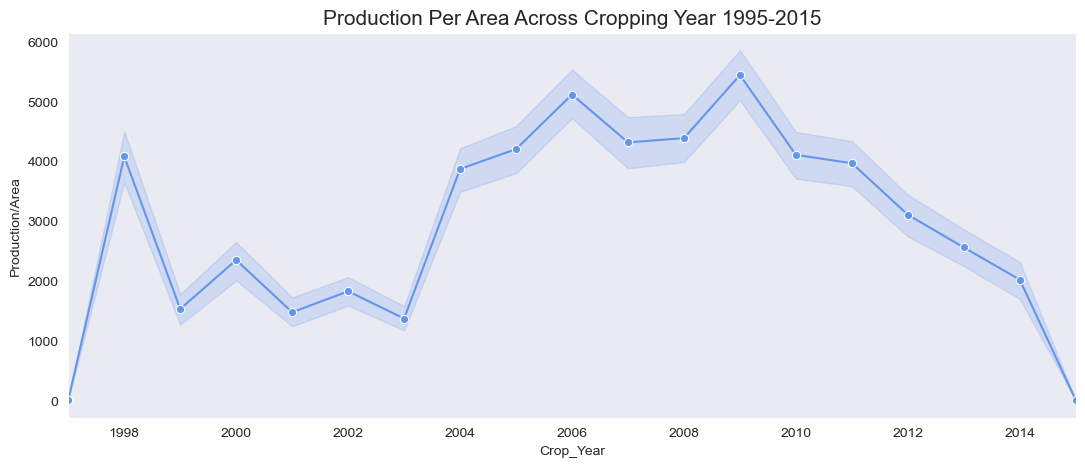

In [51]:
sns.set_style("dark")
plt.figure(figsize=(13,5))
ax_1 = sns.lineplot(data = crop_data,x = "Crop_Year", y="Production/Area",ci=70,marker="o",color="cornflowerblue")
ax_1.set_xlim(1997, 2015)
plt.title("Production Per Area Across Cropping Year 1995-2015",fontsize=15)
plt.show()

In [52]:
group_2["Production_In_Millions"] = group_2.apply(lambda row : row["Production"]/1000000, axis=1 )

In [53]:
group_2["Production_M"] = group_2.apply(lambda row : str(round(row["Production_In_Millions"],2)) + "MM",axis=1)

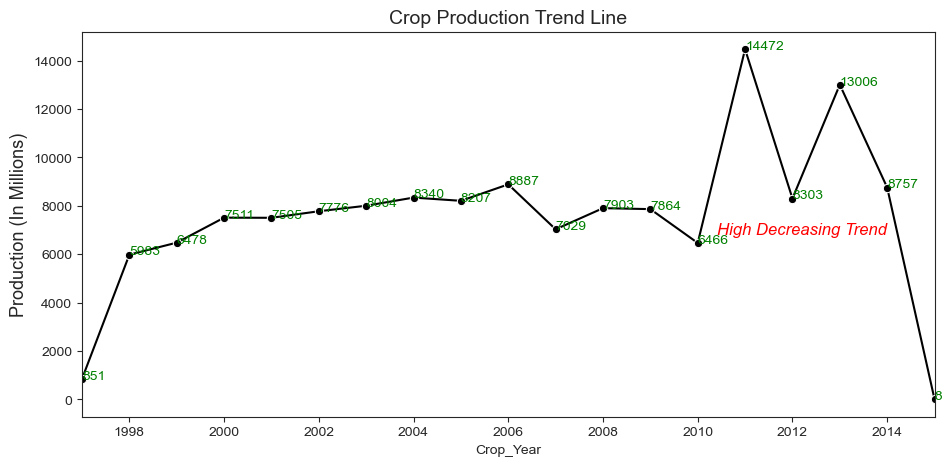

In [54]:
sns.set_style("ticks")
plt.figure(figsize=(11,5))
ax_1 = sns.lineplot(data = group_2,x = "Crop_Year", y="Production_In_Millions",marker="o",color="black")
ax_1.set_xlim(1997, 2015)
ax_1.text(2014,	7000	 , "High Decreasing Trend", 
       fontsize = 12,          # Size
       fontstyle = "oblique",  # Style
       color = "red",ha = "right", # Horizontal alignment
       va = "center")
#data labels
for x, y in zip(group_2["Crop_Year"], group_2["Production_In_Millions"]):
 plt.text(x = x, 
 y = y-10,
 s = "{:.0f}".format(y), 
 color = "green")
plt.ylabel("Production (In Millions)",fontsize=13)
plt.title("Crop Production Trend Line",fontsize=14)
plt.show()

In [55]:
crop_data.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production', 'Production/Area'],
      dtype='object')

In [56]:
group_3 = crop_data.groupby(["Season"],as_index=False).agg({"Production":"sum","Production/Area":"sum"}).sort_values(by="Production",ascending=False)

In [57]:
group_3.reset_index(drop=True,inplace=True)

In [58]:
group_3

,Season,Production,Production/Area
0,Whole Year,135111025988,inf
1,Kharif,5001585237,3.102359e+08
2,Rabi,2533417515,1.689052e+08
3,Winter,439209845,3.896095e+06
4,Summer,188132993,1.250519e+07
5,Autumn,75481310,6.951911e+06


<Axes: xlabel='Production', ylabel='Season'>

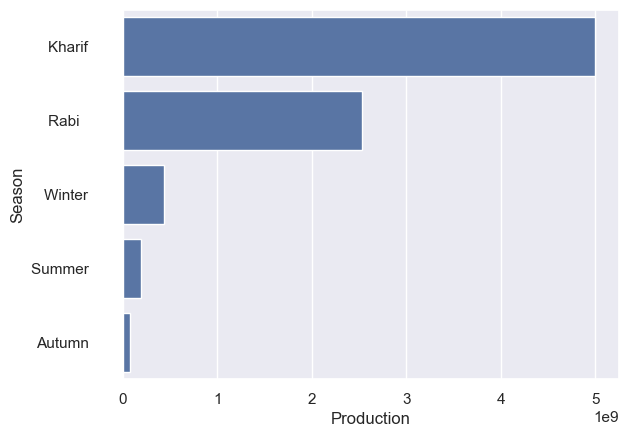

In [181]:
sns.barplot(data = group_3, y= "Season",x="Production",estimator="sum")

As we see whole year production is highest basic reasoning it happens whole year that's why the production is higher now lets check the production/Area 
contribution in each season except whole year season

In [61]:
group_3 = group_3[1:]

In [62]:
group_3["Production/Area"] = group_3["Production/Area"].astype(int)

In [63]:
group_3

,Season,Production,Production/Area
1,Kharif,5001585237,310235902
2,Rabi,2533417515,168905218
3,Winter,439209845,3896094
4,Summer,188132993,12505193
5,Autumn,75481310,6951910


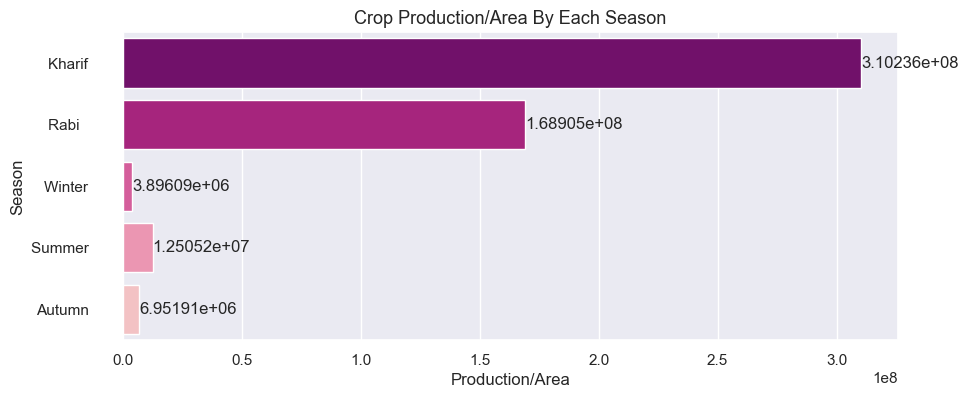

In [132]:
palette= sns.color_palette("RdPu",n_colors=6)
plt.figure(figsize= (10,4))
palette.reverse()
ax_1 =sns.barplot(data = group_3, x= "Production/Area",y="Season",palette= palette)
for x in ax_1.containers:
    ax_1.bar_label(x,fontsize=12)
plt.title("Crop Production/Area By Each Season",fontsize=13)
plt.show()

In [65]:
group_4 = crop_data.groupby(["Crop_Year","Season"],as_index=False).agg({"Production":"sum"}).sort_values(by="Crop_Year",ascending = True)

In [66]:
group_4.head(10)

,Crop_Year,Season,Production
0,1997,Autumn,3018718
1,1997,Kharif,138280321
2,1997,Rabi,120346325
3,1997,Summer,7458988
4,1997,Whole Year,560945202
5,1997,Winter,21183352
6,1998,Autumn,9992223
7,1998,Kharif,245503505
8,1998,Rabi,132922131
9,1998,Summer,15309134


In [67]:
group_4 = group_4[group_4["Season"] != "Whole Year "]

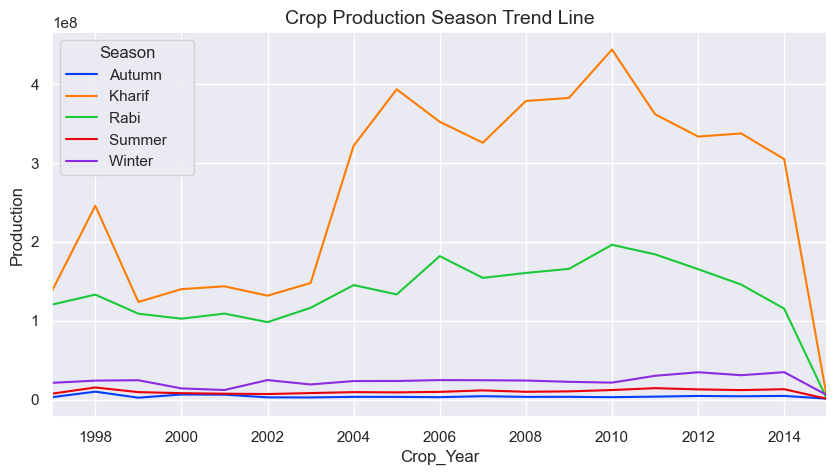

In [129]:
sns.set_theme()
plt.figure(figsize=(10,5))
ax_1 =sns.lineplot(data = group_4, x= "Crop_Year",y="Production",hue="Season",estimator="sum",palette = "bright")
ax_1.set_xlim(1997, 2015)
plt.title("Crop Production Season Trend Line",fontsize=14)
plt.show()

As per the above trendline and distribution by each croping season we can retrieve that the crop production decreases for all season crops from 2014 to
2015 their might be some cause that affect the production

In [138]:
group_5 = crop_data.groupby(["Crop"],as_index=False).agg({"Production":"sum"}).sort_values(by="Production",ascending=False)

In [142]:
group_5.reset_index(drop=True,inplace=True)

In [144]:
group_5

,Crop,Production
0,Coconut,129997356799
1,Sugarcane,5590436808
2,Rice,1618285451
3,Wheat,1345058206
4,Potato,434728891
...,...,...
119,Snak Guard,0
120,Peas (vegetable),0
121,Plums,0
122,Ribed Guard,0


# Top 20 Crop Type Producing all the years

In [149]:
group_5_a = group_5.head(20)

In [188]:
group_5_a["Production(In Millions)"] = group_5_a.apply(lambda row : row["Production"]/1000000, axis=1 )

In [190]:
group_5_a

,Crop,Production,Production(In Millions)
0,Coconut,129997356799,129997.356799
1,Sugarcane,5590436808,5590.436808
2,Rice,1618285451,1618.285451
3,Wheat,1345058206,1345.058206
4,Potato,434728891,434.728891
5,Cotton(lint),376220423,376.220423
6,Maize,366542281,366.542281
7,Jute,207770812,207.770812
8,Banana,190402908,190.402908
9,Gram,177469638,177.469638


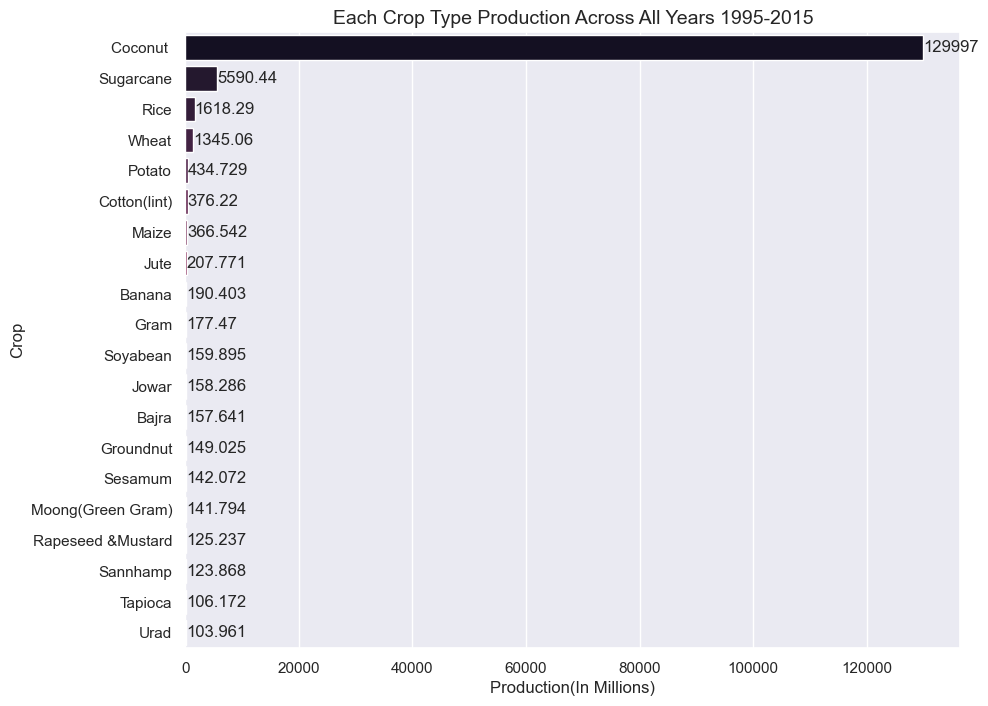

In [202]:
plt.figure(figsize = (10,8))
ax_1 = sns.barplot(data = group_5_a, x= "Production(In Millions)",y="Crop",palette="rocket")
for x in ax_1.containers:
    ax_1.bar_label(x)
plt.title("Each Crop Type Production Across All Years 1995-2015",fontsize=14)
plt.show()

# Least 10 Crop Types Producing across all Years

In [206]:
group_5_b = group_5.tail(10)
group_5_b["Production(In Millions)"] = group_5_b.apply(lambda row : row["Production"]/1000000, axis=1 )

In [208]:
group_5_b

,Crop,Production,Production(In Millions)
114,Beet Root,0,0.0
115,Other Citrus Fruit,0,0.0
116,Other Dry Fruit,0,0.0
117,Peach,0,0.0
118,Pear,0,0.0
119,Snak Guard,0,0.0
120,Peas (vegetable),0,0.0
121,Plums,0,0.0
122,Ribed Guard,0,0.0
123,Apple,0,0.0


In [218]:
data_1 = crop_data.groupby("Crop")["Production"].sum().sort_values(ascending=False)

In [228]:
data_1 = data_1.head(5)

# Top 5 Crop Type Production Contribution

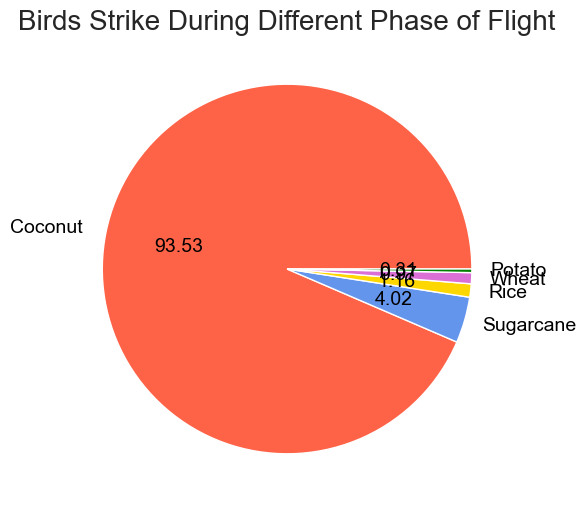

In [231]:
plt.figure(figsize=(6,6))
plt.pie(x=data_1,labels= data_1.index,autopct="%.2f",colors=[
        # matplotlib named colors 
        'tomato', 'cornflowerblue', 'gold', 'orchid', 'green', 
        "#77BFE2","brown"],textprops={"fontsize":14,"color":"black"})
plt.title("Birds Strike During Different Phase of Flight",fontsize=20)
plt.show()

In [233]:
group_6 = crop_data.groupby(["Season","Crop"],as_index=False).agg({"Production":"sum"}).sort_values(by="Production",ascending=False)

In [237]:
group_6.reset_index(drop=True,inplace=True)

In [239]:
group_6

,Season,Crop,Production
0,Whole Year,Coconut,129994900195
1,Whole Year,Sugarcane,3799928728
2,Kharif,Sugarcane,1774444484
3,Rabi,Wheat,1333210178
4,Kharif,Rice,949811635
...,...,...,...
334,Whole Year,Other Citrus Fruit,0
335,Whole Year,Water Melon,0
336,Whole Year,Yam,0
337,Whole Year,other fibres,0


In [245]:
pivot_table_crops = pd.pivot_table(group_6,values= "Production",index= "Crop",columns= "Season",aggfunc="sum",fill_value=0)

In [273]:
pivot_table_crops.columns

Index(['Autumn     ', 'Kharif     ', 'Rabi       ', 'Summer     ',
       'Whole Year ', 'Winter     '],
      dtype='object', name='Season')

In [275]:
sorted_df_pivot = pivot_table_crops.sort_values(by=['Autumn     '], ascending=False)

In [277]:
sorted_df_pivot

Season,Autumn,Kharif,Rabi,Summer,Whole Year,Winter
Crop,,,,,,
Rice,53601263,949811635,84703836,130032786,18566447,381569484
Maize,9515536,283922891,49642862,15089217,7735142,636633
Sesamum,2930939,115981493,10760442,3588152,7552764,1258406
Ragi,2826934,42794095,1335685,1462265,2669554,935459
Paddy,2034745,5075127,163930,5110559,0,19318040
...,...,...,...,...,...,...
Garlic,0,33810,1366826,0,44668330,0
Drum Stick,0,0,0,0,77121,0
Cucumber,0,0,0,0,0,0


So as per the data Rice is the crop type that produces highest in the autumn season

In [280]:
sorted_df_pivot = pivot_table_crops.sort_values(by=['Kharif     '], ascending=False)

In [282]:
sorted_df_pivot

Season,Autumn,Kharif,Rabi,Summer,Whole Year,Winter
Crop,,,,,,
Sugarcane,13743,1774444484,27716,4900,3799928728,16017237
Rice,53601263,949811635,84703836,130032786,18566447,381569484
Cotton(lint),20,357384627,725609,17190,18092967,10
Maize,9515536,283922891,49642862,15089217,7735142,636633
Jute,441559,203798911,3530322,20,0,0
...,...,...,...,...,...,...
Plums,0,0,0,0,0,0
Pome Fruit,0,0,0,0,481340,0
Pump Kin,0,0,0,0,24465126,0


So as per the above Sugarcane is the crop type that produces most in the kharif season

In [288]:
sorted_df_pivot = pivot_table_crops.sort_values(by=['Rabi       '], ascending=False)
sorted_df_pivot

Season,Autumn,Kharif,Rabi,Summer,Whole Year,Winter
Crop,,,,,,
Wheat,0,2330074,1333210178,52687,9448133,17134
Potato,1670,7364495,205182096,586412,205491480,16102738
Gram,0,420286,170883499,0,6163536,2317
Rapeseed &Mustard,0,2920580,115979961,0,6298944,37443
Rice,53601263,949811635,84703836,130032786,18566447,381569484
...,...,...,...,...,...,...
Cucumber,0,0,0,0,0,0
Pump Kin,0,0,0,0,24465126,0
Colocosia,0,49840,0,0,0,0


Wheat is the highest for Rabi Season

In [291]:
sorted_df_pivot = pivot_table_crops.sort_values(by=['Summer     '], ascending=False)
sorted_df_pivot

Season,Autumn,Kharif,Rabi,Summer,Whole Year,Winter
Crop,,,,,,
Rice,53601263,949811635,84703836,130032786,18566447,381569484
Maize,9515536,283922891,49642862,15089217,7735142,636633
Bajra,0,145598582,1418695,7436768,3187095,0
Groundnut,386678,122112949,11990248,7410398,7076106,48690
Moong(Green Gram),1235296,93740708,22798308,5345598,16667988,2005917
...,...,...,...,...,...,...
Ginger,0,198376,518077,0,105473,0
Garlic,0,33810,1366826,0,44668330,0
Drum Stick,0,0,0,0,77121,0


Rice is the highest for summer season we all see its also highest for autumn season

In [294]:
sorted_df_pivot = pivot_table_crops.sort_values(by=['Winter     '], ascending=False)
sorted_df_pivot

Season,Autumn,Kharif,Rabi,Summer,Whole Year,Winter
Crop,,,,,,
Rice,53601263,949811635,84703836,130032786,18566447,381569484
Paddy,2034745,5075127,163930,5110559,0,19318040
Potato,1670,7364495,205182096,586412,205491480,16102738
Sugarcane,13743,1774444484,27716,4900,3799928728,16017237
Moong(Green Gram),1235296,93740708,22798308,5345598,16667988,2005917
...,...,...,...,...,...,...
Garlic,0,33810,1366826,0,44668330,0
Drum Stick,0,0,0,0,77121,0
Cucumber,0,0,0,0,0,0


Rice is the same highest for winter season as well and coconut for whole year

In [297]:
crop_data.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production', 'Production/Area'],
      dtype='object')

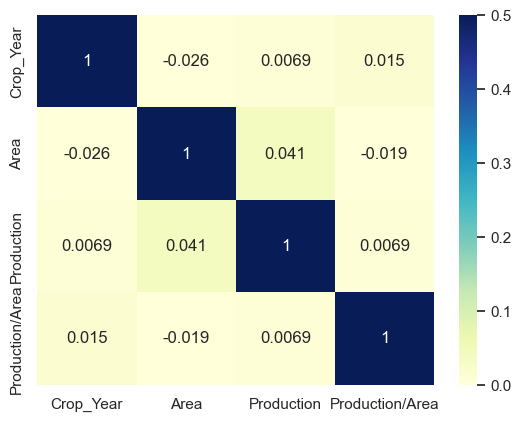

In [303]:
dataplot = sns.heatmap(crop_data.corr(numeric_only=True),vmin=0,vmax=0.5, cmap="YlGnBu", annot=True)

# Conversion of String values into numeric for machine learning models

In [325]:
starting_value = 0
for x in crop_data["State_Name"].unique():
    crop_data = crop_data.replace(to_replace=x,value=starting_value)
    starting_value = starting_value+1

In [327]:
crop_data["State_Name"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
      dtype=int64)

In [330]:
starting_value = 0
for x in crop_data["District_Name"].unique():
    crop_data = crop_data.replace(to_replace=x,value=starting_value)
    starting_value = starting_value+1

In [332]:
crop_data["District_Name"].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

We can drop this column for predictive analysis as we take the state is enough and this is also too much unique values generated 

In [335]:
starting_value = 0
for x in crop_data["Season"].unique():
    crop_data = crop_data.replace(to_replace=x,value=starting_value)
    starting_value = starting_value+1

In [337]:
crop_data["Season"].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [339]:
starting_value = 0
for x in crop_data["Crop"].unique():
    crop_data = crop_data.replace(to_replace=x,value=starting_value)
    starting_value = starting_value+1

In [341]:
crop_data["Crop"].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123], dtype=int64)

In [343]:
crop_data = crop_data.drop(columns = ["District_Name"],axis=1)

In [347]:
crop_data.to_excel("Crop_Data_Numeric.xlsx",sheet_name = "result")